## Importing the required libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk
import seaborn as sbn
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string

from sklearn.metrics import mean_squared_error

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_a54292bce46144ae85fc6df767b3966c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='J-A6ho91ipU77L2egreewgGqVrId2Rf7OL-_bfl7OezF',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_a54292bce46144ae85fc6df767b3966c.get_object(Bucket='amazonrecommendation-donotdelete-pr-b4a2j9zkoc3idd',Key='Reviews.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Reading the CSV file

In [3]:
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


# Product based

In [4]:
count = df.groupby("ProductId", as_index=False).count()
mean = df.groupby("ProductId", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['ProductId'])
dfMerged

,Id_x,ProductId,UserId_x,ProfileName_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,Score_x,Time_x,Summary_x,Text_x,Id_y,UserId_y,ProfileName_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,Score_y,Time_y,Summary_y,Text_y
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1,1,1,1,1,1,1,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,1,1,1,1,1,1,1,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1,1,1,1,1,1,1,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1,1,1,1,1,1,1,1,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,4,4,4,4,4,4,4,4,4
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,4,4,4,4,4,4,4,4
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,4,4,4,4,4,4,4,4,4
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,4,4,4,4,4,4,4,4,4
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1,1,1,1,1,1,1,1,1
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,1,1,1,1,1,1,1,1,1


In [5]:
dfMerged["totalReviewers"] = dfMerged["ProfileName_y"]
dfMerged["overallScore"] = dfMerged["Score_x"]
dfMerged["summaryReview"] = dfMerged["Summary_x"]

dfNew = dfMerged[['ProductId','summaryReview','overallScore',"totalReviewers"]]

# Selecting products which have more than 50 reviews

In [6]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 50]
dfCount

,Id_x,ProductId,UserId_x,ProfileName_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,Score_x,Time_x,Summary_x,Text_x,...,ProfileName_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,Score_y,Time_y,Summary_y,Text_y,totalReviewers,overallScore,summaryReview
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,1343433600,yummy,I love the Quaker soft baked cookies. The rea...,...,913,913,913,913,913,913,913,913,5,yummy
563615,563616,B007JFMH8M,A3H19949DTO802,Jessi,0,0,5,1341878400,Healthy and yummy too,We love these! They are so soft and tasty. The...,...,913,913,913,913,913,913,913,913,5,Healthy and yummy too
563629,563630,B007JFMH8M,A1ACM1CBGORBN1,Sherry Berry,0,0,4,1344124800,Soft and chewy but a bit too sweet!,I am kind of shocked that these cookies were t...,...,913,913,913,913,913,913,913,913,4,Soft and chewy but a bit too sweet!
563628,563629,B007JFMH8M,A2H2I5FY1PUHP1,Boilermate,0,0,4,1344211200,Pretty Good Cookie,"First of all, I like that the cookies are indi...",...,913,913,913,913,913,913,913,913,4,Pretty Good Cookie
563627,563628,B007JFMH8M,A10PEXB6XAQ5XF,Michael Gallagher,0,0,3,1344211200,Good Taste and Flavor But a Little on the Dry ...,This is a pretty good cookie in terms of taste...,...,913,913,913,913,913,913,913,913,3,Good Taste and Flavor But a Little on the Dry ...
563626,563627,B007JFMH8M,APMYPD97EHUUZ,"John H. Gruver ""brainactiv""",0,0,1,1344211200,Way too much oat bran = chewy but dry cookies,I tried one: gave it two bites (to be sure) an...,...,913,913,913,913,913,913,913,913,1,Way too much oat bran = chewy but dry cookies
563625,563626,B007JFMH8M,A1IDWUYX4QXTUE,Leslie,0,0,2,1344211200,Not bad but not good either,"I'm always on the look-out for a good tasting,...",...,913,913,913,913,913,913,913,913,2,Not bad but not good either
563624,563625,B007JFMH8M,A2PD27UKAD3Q00,"Wilhelmina Gaudy ""coolartsybabe""",0,0,4,1344211200,Great Flavor But Too Dry,Quaker soft Baked Oatmeal Cookies with Raisins...,...,913,913,913,913,913,913,913,913,4,Great Flavor But Too Dry
563623,563624,B007JFMH8M,A35W3JQYP0M655,"Ambergris ""John Thomas""",0,0,4,1344384000,Good Buy Here......Average Oatmeal Cookie,As a lover of oatmeal cookies since the days o...,...,913,913,913,913,913,913,913,913,4,Good Buy Here......Average Oatmeal Cookie
563622,563623,B007JFMH8M,A30SPABIPVN5MV,William T. Barto,0,0,3,1344643200,"Nice texture, not so much taste",This is an interesting product - the texture i...,...,913,913,913,913,913,913,913,913,3,"Nice texture, not so much taste"


# Grouping all the summary Reviews by product ID

In [7]:
dfProductReview = df.groupby("ProductId", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("ProductId")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [8]:
dfProductReview

,ProductId,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
0,0006641040,150511.0,3.027027,3.378378,4.351351,1.195771e+09
1,141278509X,515426.0,1.000000,1.000000,5.000000,1.332547e+09
2,2734888454,24750.5,0.500000,0.500000,3.500000,1.194005e+09
3,2841233731,308077.0,0.000000,0.000000,5.000000,1.345853e+09
4,7310172001,171190.0,0.809249,1.219653,4.751445,1.281072e+09
5,7310172101,217421.0,0.809249,1.219653,4.751445,1.281072e+09
6,7800648702,542519.5,0.000000,0.000000,4.000000,1.341446e+09
7,9376674501,154693.0,0.000000,0.000000,5.000000,1.312243e+09
8,B00002N8SM,76871.5,0.473684,0.868421,1.789474,1.271608e+09
9,B00002NCJC,2774.5,0.000000,0.000000,4.500000,1.282003e+09


# create dataframe with certain columns

In [9]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="ProductId", how='inner')

In [10]:
df3 = df3[['ProductId','summaryReview','Score']]

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


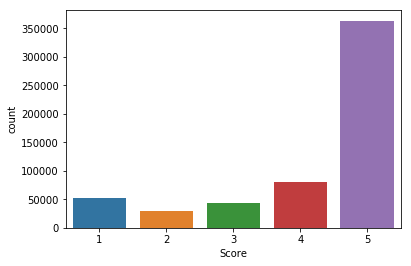

In [11]:
sbn.countplot(df['Score'])

# Text Cleaning - Summary column

In [12]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText


In [13]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['Score'], keep='last')
df3 = df3.reset_index()

In [14]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [15]:
#save 
dfReviews.to_csv("dfReviews.csv")

In [16]:

# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [17]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

770
86


In [18]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [19]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["ProductId"][lentrain + i] ," average rating is ",df3["Score"][lentrain + i])
    print ("The first similar product is ", df3["ProductId"][first_related_product] ," average rating is ",df3["Score"][first_related_product])
    print ("The second similar product is ", df3["ProductId"][second_related_product] ," average rating is ",df3["Score"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B007OXJK3Y  average rating is  3.56603773585
The first similar product is  B007OXJJQ2  average rating is  4.44
The second similar product is  B002QGK2V8  average rating is  3.44848484848
-----------------------------------------------------------
Based on product reviews, for  B007OXJKF2  average rating is  3.57692307692
The first similar product is  B004IRGD3O  average rating is  4.16883116883
The second similar product is  B007OXJJQ2  average rating is  4.44
-----------------------------------------------------------
Based on product reviews, for  B007OXJL0G  average rating is  4.1393442623
The first similar product is  B007OXJJQ2  average rating is  4.44
The second similar product is  B004IRGD3O  average rating is  4.16883116883
-----------------------------------------------------------
Based on product reviews, for  B007PA30ZU  average rating is  4.4907063197
The first similar product is  B001D0GV90  average rating is  4.43783783784
The second simila

### Predicting Review Score

In [20]:
df5_train_target = df3["Score"][:lentrain]
df5_test_target = df3["Score"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         2
          3       0.58      0.41      0.48        27
          4       0.76      0.88      0.81        57

avg / total       0.68      0.71      0.69        86



### Accuracy of the model

In [21]:
print (accuracy_score(df5_test_target, knnpreds_test))


0.709302325581


In [22]:
print(mean_squared_error(df5_test_target, knnpreds_test))


0.325581395349


In [28]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-06-21 06:20:44,185 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [29]:
wml_credentials={
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "access_key": "KFdA45Pxbb1m9vhYOOL_XI7lpYP_wVdzQJA0rLJIfDjI",
  "username": "f34eb6d2-64b0-46ff-8c5e-95fdbfffd8da",
  "password": "08cdcc76-e9be-481a-8cbd-96a3ac7f7969",
  "instance_id": "94d85d95-8ebf-42b5-a578-5900ed215244"
}

In [30]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [31]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Pavan", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "pavandileep62@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Recomendation"}

In [32]:
model_artifact =client.repository.store_model(knnclf, meta_props=model_props)

In [33]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [34]:
deployment = client.deployments.create(published_model_uid, name="Salary Prediction")



#######################################################################################

Synchronous deployment creation for uid: '2f270b63-338b-48ba-9d1d-47905c0f051d' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1b51b292-dd28-46fa-b559-47d5e7221bfa'
------------------------------------------------------------------------------------------------




In [38]:
deployment

{'entity': {'deployable_asset': {'created_at': '2019-06-21T06:21:02.667Z',
   'guid': '2f270b63-338b-48ba-9d1d-47905c0f051d',
   'name': 'Recomendation',
   'type': 'model',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/94d85d95-8ebf-42b5-a578-5900ed215244/published_models/2f270b63-338b-48ba-9d1d-47905c0f051d'},
  'deployed_version': {'guid': '646d6fa0-df3b-450a-9aa9-c7b92b11edd8',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/ml_assets/models/2f270b63-338b-48ba-9d1d-47905c0f051d/versions/646d6fa0-df3b-450a-9aa9-c7b92b11edd8'},
  'description': 'Description of deployment',
  'model_type': 'scikit-learn-0.19',
  'name': 'Salary Prediction',
  'runtime_environment': 'python-3.5',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/94d85d95-8ebf-42b5-a578-5900ed215244/deployments/1b51b292-dd28-46fa-b559-47d5e7221bfa/online',
  'status': 'DEPLOY_SUCCESS',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'type': 'online'},
 'metadata': {'created_at': '2019-06-21

In [40]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [41]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/94d85d95-8ebf-42b5-a578-5900ed215244/deployments/1b51b292-dd28-46fa-b559-47d5e7221bfa/online'